# PSyKE's demo for regression tasks

Some imports.

In [1]:
from psyke import Extractor
from psyke.optimizer.pedro import PEDRO
from psyke.optimizer import Objective
from psyke.optimizer.crash import CRASH
from psyke.clustering import ClusterExtractor
from sklearn.neighbors import KNeighborsRegressor
from psyke.utils.logic import pretty_theory
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd

Import an artificial dataset.

In [2]:
dataset = pd.read_csv("test/resources/datasets/df.csv")
#dataset = pd.read_csv("test/resources/datasets/CCPP.csv", sep=";", decimal=",")
#dataset

Split between train and test set in a reproducible way.

In [3]:
dataset = dataset[["X", "Y", "Z1"]].dropna()
train, test = train_test_split(dataset, test_size=0.5, random_state=10)

We use as predictor a KNN and we train it.

In [4]:
predictor = KNeighborsRegressor(n_neighbors=3).fit(train.iloc[:, :-1], train.iloc[:, -1])

print((abs(predictor.predict(test.iloc[:, :-1]).flatten() - test.iloc[:, -1])).mean())

0.0


We create several extractors that use ITER, GridEx and GridREx algorithms to extract prolog rules from the predictor.

In [5]:
creepy = Extractor.creepy(predictor, depth=3, error_threshold=0.02, output=ClusterExtractor.Target.REGRESSION)
theory_from_creepy = creepy.extract(train)
print('CReEPy performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(creepy.n_rules, creepy.mae(test), creepy.mae(test, predictor)))
print('CReEPy extracted rules:\n\n' + pretty_theory(theory_from_creepy))

CReEPy performance (3 rules):
MAE = 0.00
MAE fidelity = 0.00

CReEPy extracted rules:

'Z1'(X, Y, Z1) :-
    X in [0.402684, 0.597316], Y in [0.402684, 0.597316], Z1 is 1.0.
'Z1'(X, Y, Z1) :-
    X in [0.154361, 0.845639], Y in [0.154361, 0.845639], Z1 is -1.0.
'Z1'(X, Y, Z1) :-
    X in [-0.000001, 1.000001], Y in [-0.000001, 1.000001], Z1 is 0.0.


In [7]:
cream = Extractor.cream(predictor, depth=2, error_threshold=0.02, output=ClusterExtractor.Target.CONSTANT)
theory_from_cream = cream.extract(train)
print('CREAM performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(cream.n_rules, cream.mae(test), cream.mae(test, predictor)))
print('CREAM extracted rules:\n\n' + pretty_theory(theory_from_cream))

CREAM performance (3 rules):
MAE = 0.00
MAE fidelity = 0.00

CREAM extracted rules:

'Z1'(X, Y, 1.0) :-
    X in [0.402684, 0.597316], Y in [0.402684, 0.597316].
'Z1'(X, Y, -1.0) :-
    X in [0.154361, 0.845639], Y in [0.154361, 0.845639].
'Z1'(X, Y, 0.0) :-
    X in [-0.000001, 1.000001], Y in [-0.000001, 1.000001].


Algorithm.CReEPy. Depth: 1. Threshold = 0.02. MAE = 0.56, 2 rules
Algorithm.CReEPy. Depth: 1. Threshold = 0.02. MAE = 0.56, 2 rules
Algorithm.CReEPy. Depth: 1. Threshold = 0.56. MAE = 0.56, 2 rules

Algorithm.CReEPy. Depth: 2. Threshold = 0.02. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 2. Threshold = 0.02. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 2. Threshold = 0.40. MAE = 0.40, 3 rules

Algorithm.CReEPy. Depth: 3. Threshold = 0.02. MAE = 0.40, 4 rules
Algorithm.CReEPy. Depth: 3. Threshold = 0.02. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 3. Threshold = 0.03. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 3. Threshold = 0.40. MAE = 0.40, 3 rules

Algorithm.CReEPy. Depth: 4. Threshold = 0.02. MAE = 0.40, 5 rules
Algorithm.CReEPy. Depth: 4. Threshold = 0.02. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 4. Threshold = 0.03. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 4. Threshold = 0.40. MAE = 0.40, 3 rules

Algorithm.CReEPy. Depth: 5. Threshold = 0.02. MAE = 0.40, 6 rules
Algori

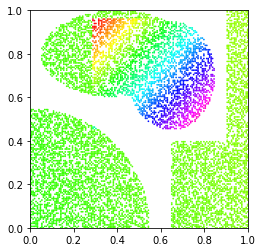

In [7]:
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#plt.ylim((0, 1))
#ax1.scatter(test.X, test.Y, c=test.iloc[:, -1], s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
#ax1.set_xlim((0, 1))
#ax1.set_aspect("equal")
#ax2.scatter(test.X, test.Y, c=predictor.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
#ax2.set_xlim((0, 1))
#ax2.set_aspect("equal")
#plt.show()

crash = CRASH(predictor, train, max_depth=5, patience=2, readability_tradeoff=.5, algorithm=CRASH.Algorithm.CReEPy)
crash.search()
(_, _, depth, threshold) = crash.get_best()[0]

creepy = Extractor.creepy(predictor, depth=depth, error_threshold=threshold, output=ClusterExtractor.Target.CONSTANT)
theory_from_creepy = creepy.extract(train)
print('CReEPy performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(creepy.n_rules, creepy.mae(test), creepy.mae(test, predictor)))
#print('CReEPy extracted rules:\n\n' + pretty_theory(theory_from_cream))

plt.scatter(test.X, test.Y, c=creepy.predict(test.iloc[:, :-1]), s=0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.gca().set_aspect("equal")
plt.show()

Algorithm.CREAM. Depth: 1. Threshold = 0.02. MAE = 0.56, 2 rules
Algorithm.CREAM. Depth: 1. Threshold = 0.02. MAE = 0.56, 2 rules
Algorithm.CREAM. Depth: 1. Threshold = 0.56. MAE = 0.56, 2 rules

Algorithm.CREAM. Depth: 2. Threshold = 0.02. MAE = 0.02, 4 rules
Algorithm.CREAM. Depth: 2. Threshold = 0.02. MAE = 0.02, 4 rules
Algorithm.CREAM. Depth: 2. Threshold = 0.03. MAE = 0.02, 4 rules

**********************
*Best Algorithm.CREAM*
**********************
MAE = 0.02, 4 rules
Threshold = 0.02
Depth = 2

**********************
*Best   MAE  *
**********************
MAE = 0.02, 4 rules
Threshold = 0.02
Depth = 2

**********************
*Best N rules*
**********************
MAE = 0.56, 2 rules
Threshold = 0.02
Depth = 1

CREAM performance (4 rules):
MAE = 0.22
MAE fidelity = 0.24



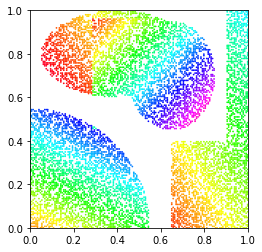

In [8]:
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#plt.ylim((0, 1))
#ax1.scatter(test.X, test.Y, c=test.iloc[:, -1], s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
#ax1.set_xlim((0, 1))
#ax1.set_aspect("equal")
#ax2.scatter(test.X, test.Y, c=predictor.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
#ax2.set_xlim((0, 1))
#ax2.set_aspect("equal")
#plt.show()

crash = CRASH(predictor, train, max_depth=5, patience=2, readability_tradeoff=.75, algorithm=CRASH.Algorithm.CREAM)
crash.search()
(_, _, depth, threshold) = crash.get_best()[0]

cream = Extractor.cream(predictor, depth=depth, error_threshold=threshold, output=ClusterExtractor.Target.CONSTANT)
theory_from_cream = cream.extract(train)
print('CREAM performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(cream.n_rules, cream.mae(test), cream.mae(test, predictor)))
#print('CREAM extracted rules:\n\n' + pretty_theory(theory_from_cream))

plt.scatter(test.X, test.Y, c = cream.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.gca().set_aspect("equal")
plt.show()

In [23]:
it = Extractor.iter(predictor, min_update=1.0 / 20, n_points=1, max_iterations=600,
                    min_examples=100, threshold=1.5)
theory_from_iter = it.extract(train)
print('ITER performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(it.n_rules, it.mae(test), it.mae(test, predictor)))
print('ITER extracted rules:\n\n' + pretty_theory(theory_from_iter))

ITER performance (18 rules):
MAE = 0.86
MAE fidelity = 0.86

ITER extracted rules:

'Z3'(X, Y, 5.1428) :-
    X in [0.4772, 0.7772], Y in [0.5242, 0.8242].
'Z3'(X, Y, 3.5922) :-
    X in [0.4772, 1.0], Y in [0.8242, 1.0].
'Z3'(X, Y, 6.8076) :-
    X in [0.7772, 0.8772], Y in [0.4742, 0.8242].
'Z3'(X, Y, 6.9641) :-
    X in [0.4772, 0.7772], Y in [0.4242, 0.5242].
'Z3'(X, Y, 5.3781) :-
    X in [0.0, 0.4772], Y in [0.2742, 0.5242].
'Z3'(X, Y, 3.6889) :-
    X in [0.0, 0.4772], Y in [0.0742, 0.2742].
'Z3'(X, Y, 1.724) :-
    X in [0.0, 0.4772], Y in [0.0, 0.0742].
'Z3'(X, Y, 3.1406) :-
    X in [0.3272, 0.4772], Y in [0.5242, 0.8242].
'Z3'(X, Y, 1.5242) :-
    X in [0.0, 0.3272], Y in [0.5242, 0.8242].
'Z3'(X, Y, 1.3677) :-
    X in [0.3272, 0.4772], Y in [0.8242, 1.0].
'Z3'(X, Y, -0.136) :-
    X in [0.1272, 0.3272], Y in [0.8242, 1.0].
'Z3'(X, Y, -1.8432) :-
    X in [0.0, 0.1272], Y in [0.8242, 1.0].
'Z3'(X, Y, 3.2523) :-
    X in [0.7772, 1.0], Y in [0.3742, 0.4742].
'Z3'(X, Y, 1.752

In [17]:
pedro = PEDRO(predictor, train, max_mae_increase=1.2, min_rule_decrease=0.9, readability_tradeoff=0.1,
              max_depth=5, patience=3, algorithm=PEDRO.Algorithm.GRIDEX, objective=Objective.MODEL)
pedro.search()
(_, _, threshold, grid) = pedro.get_best()[0]

gridEx = Extractor.gridex(predictor, grid, threshold=threshold)
theory_from_gridEx = gridEx.extract(train)
print('GridEx performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(gridEx.n_rules, gridEx.mae(test), gridEx.mae(test, predictor)))
print('GridEx extracted rules:\n\n' + pretty_theory(theory_from_gridEx))

Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 0.02. MAE = 1.20, 4 rules
Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 0.02. MAE = 1.20, 4 rules
Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 0.61. MAE = 1.20, 4 rules
Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 1.20. MAE = 1.20, 4 rules

Algorithm.GRIDEX. Grid (2). Fixed (2). Threshold = 0.02. MAE = 1.20, 20 rules
Algorithm.GRIDEX. Grid (2). Fixed (2). Threshold = 0.02. MAE = 1.20, 20 rules

Algorithm.GRIDEX. Grid (1). Fixed (3). Threshold = 0.02. MAE = 0.99, 9 rules
Algorithm.GRIDEX. Grid (1). Fixed (3). Threshold = 0.02. MAE = 0.99, 9 rules
Algorithm.GRIDEX. Grid (1). Fixed (3). Threshold = 0.51. MAE = 0.99, 9 rules
Algorithm.GRIDEX. Grid (1). Fixed (3). Threshold = 0.99. MAE = 0.99, 9 rules

Algorithm.GRIDEX. Grid (2). Fixed (3). Threshold = 0.02. MAE = 0.99, 86 rules
Algorithm.GRIDEX. Grid (2). Fixed (3). Threshold = 0.02. MAE = 0.99, 86 rules

Algorithm.GRIDEX. Grid (1). Adaptive ([(0.99, 2)]). Threshold = 0.02

In [18]:
pedro = PEDRO(predictor, train, max_mae_increase=1.2, min_rule_decrease=0.9, readability_tradeoff=0.1,
              max_depth=5, patience=3, algorithm=PEDRO.Algorithm.GRIDREX, objective=Objective.MODEL)
pedro.search()
(_, _, threshold, grid) = pedro.get_best()[0]

gridREx = Extractor.gridrex(predictor, grid, threshold=threshold)
theory_from_gridREx = gridREx.extract(train)
print('GridREx performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(gridREx.n_rules, gridREx.mae(test), gridREx.mae(test, predictor)))
print('GridREx extracted rules:\n\n' + pretty_theory(theory_from_gridREx))

Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 0.02. MAE = 0.54, 4 rules
Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 0.02. MAE = 0.54, 4 rules
Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 0.28. MAE = 0.54, 4 rules
Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 0.54. MAE = 0.54, 4 rules

Algorithm.GRIDREX. Grid (2). Fixed (2). Threshold = 0.02. MAE = 0.54, 20 rules
Algorithm.GRIDREX. Grid (2). Fixed (2). Threshold = 0.02. MAE = 0.54, 15 rules

Algorithm.GRIDREX. Grid (1). Fixed (3). Threshold = 0.02. MAE = 0.36, 9 rules
Algorithm.GRIDREX. Grid (1). Fixed (3). Threshold = 0.02. MAE = 0.36, 8 rules
Algorithm.GRIDREX. Grid (1). Fixed (3). Threshold = 0.03. MAE = 0.36, 8 rules
Algorithm.GRIDREX. Grid (1). Fixed (3). Threshold = 0.20. MAE = 0.36, 8 rules
Algorithm.GRIDREX. Grid (1). Fixed (3). Threshold = 0.36. MAE = 0.36, 8 rules

Algorithm.GRIDREX. Grid (2). Fixed (3). Threshold = 0.02. MAE = 0.36, 74 rules
Algorithm.GRIDREX. Grid (2). Fixed (3). Threshold = 0.02. 